# Simple gradient descent example
## Christian Igel, 2023

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch

Let's define a two-dimensional quadratic function to be minimized and its gradient:

In [2]:
p_f = 0.5  # some parameter changing the shape of the function
# Quadratic function
def f(x, y):
    return (p_f*x)**2 + y**2 + p_f*x*y
# Gradient of the function
def df(x, y):
    return (p_f**2)*2*x + p_f*y, 2*y + p_f*x, 


Now we optimize the function using gradient descent with leanring rate `eta`.
Try different values, `eta = 0.01`, `eta = 0.1`, `eta = 0.5`, and , `eta = 0.75`, and play with the number of steps.

In [3]:
# Learning rate
eta = 0.5
# Numer of steps
n_iter = 4

r = 1.  # we will plot the function over x, y in [-r, r]

# Define starting point in the upper right corner of plot
xi = 0.9*r  
yi = 0.8*r
p_x = [xi]  # list of x-values
p_y = [yi]  # list of y-values

# Do steepest descent optimization:
for i in range(n_iter):
    dx, dy = df(xi, yi)  # compute gradient
    xi -= eta * dx  # update x-coordinate
    yi -= eta * dy  # update y-coordinate
    p_x.append(xi)  # store x-coordinate
    p_y.append(yi)  # store y-coordinate
    

In [3]:
# Implement the gradient descent algorithm using auto grad
p_f = 0.5

# Learning rate
eta = 0.5

# Numer of steps
n_iter = 4

r = 1. # we will plot the function over x, y in [-r, r]

def f(x, y):
    return (p_f*x)**2 + y**2 + p_f*x*y

# ext_grad = torch.Tensor([1.])
x = torch.ones(1, requires_grad=True)
y = torch.ones(1, requires_grad=True)
with torch.no_grad():
    x *= 0.9 * r
    y *= 0.8 * r
p_x = [torch.Tensor.item(x)]
p_y = [torch.Tensor.item(y)]

for i in range(n_iter):
    M = (p_f*x)**2 + y**2 + p_f*x*y
    M.backward(gradient=torch.Tensor([1.]))
    torch.optim.SGD([x, y], lr=eta).step()
    y.grad.zero_()
    x.grad.zero_()
    p_x.append(torch.Tensor.item(x))
    p_y.append(torch.Tensor.item(y))

print(p_x)
print(p_y)


[0.8999999761581421, 0.47499996423721313, 0.41249996423721313, 0.3390624523162842, 0.28007808327674866]
[0.800000011920929, -0.22499996423721313, -0.11874999105930328, -0.10312499105930328, -0.08476561307907104]


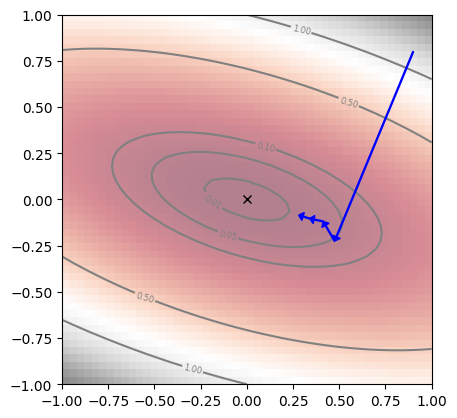

In [4]:
# Make contour plot
x = np.linspace(-r, r, 50)
y = np.linspace(-r, r, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
contours = plt.contour(X, Y, Z, [0.01, 0.05, 0.1, 0.5, 1.], colors='grey')
plt.clabel(contours, inline=True, fontsize=6)
plt.imshow(Z, extent=[-r, r, -r, r], origin='lower', cmap='RdGy', alpha=0.5)

# Add optimum
plt.plot(0, 0, 'x', c='k')

# Plot gradient steps
for i in range(n_iter):
    plt.arrow(p_x[i], p_y[i], p_x[i+1]-p_x[i], p_y[i+1]-p_y[i], width=.005, head_width=.045, head_length=.025, length_includes_head=True, fc='b', ec='b', zorder=10)